For a list of `numpy` functions, see your Evernote.

One of the reasons NumPy is so important for numerical computations in Python is because it is **designed for efficiency on large arrays of data**. There are a number of reasons for this:
- NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.
- NumPy operations perform complex computations on entire arrays without the need for Python for loops.

In [1]:
import numpy as np

## Creating arrays

In [2]:
data = [[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]]
arr = np.array(data, dtype=np.float64)
arr

array([[[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]],

       [[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]]])

In [3]:
print(arr.shape) # tuple of dimension info of the np.ndarray
print(arr.ndim) # number of dimensions in the np.ndarray
print(arr.dtype)
# If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised.
arr.astype(np.int64) 
print(arr.dtype)

(2, 3, 4)
3
float64
float64


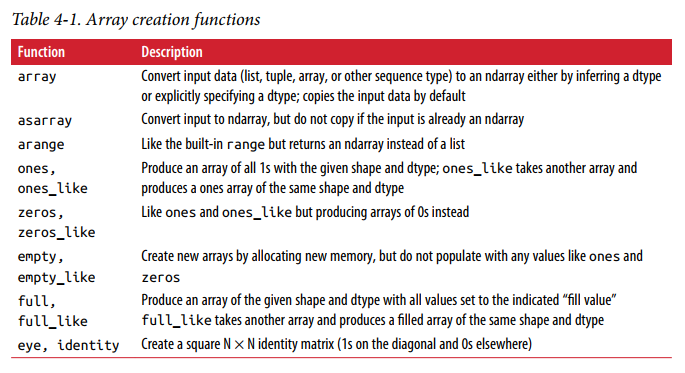

## Arithmetics

- Any arithmetic operations between equal-size arrays applies the operation element-wise.
- Arithmetic operations with scalars propagate the scalar argument to each element in the array; see broadcasting in [advanced](advanced.ipynb).

## Indexing

The basic indexing of `numpy` is like that in `pandas` (or `pandas` inherents that from `numpy`), including indexing with slices, boolean indexing (saving the extra `loc` complexity compared to `pandas`),  

One thing that is worth noting is that if you assign a scalar value to a slice, the value is propagated (or broadcasted henceforth) to the entire selection. An important first distinction from `Python`’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array. If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly `copy()` the array.

In [4]:
arr = np.arange(10)
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

To access individual element, you can pass a comma-separated list of indices

In [5]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[0, 2]

3

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions.

In [6]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

The indexing that `numpy` does but `pandas` does not is the following **fancy indexing**.

In [7]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

This select a subset of the rows in a particular order.

In [8]:
arr[[4, 3, 0, 6]] 

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Passing multiple index arrays does something slightly different; it selects a onedimensional array of elements corresponding to each tuple of indices.

In [9]:
arr = np.arange(32).reshape((8, 4))
print(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

There are also fancier indexing functions, such as `take` and `put`. But I don't see the advantages of those over what is already introduced here.

`:` is used to select everything in the axis. A more fancy way is `slice(None)`, which can also mean `:` over arbitrarily multiple axes.

## Transposing Arrays and Swapping Axes

Transposing and axes swapping are two common ways to change the shape of `ndarray`s. 
- `transpose` or `T` is just the transpose of matrices in the usual sense. There is also transpose for higher-dimensional arrays, but probably it causes more confusion that solving problems.
- `swapaxes` is swapping two axes. What happens is for any fixed values of other dimensions/axes, the two dimensions to be swapped constitute a matrix, and swapping is just transposing this matrix

In [10]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
arr.swapaxes(1, 2)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Concatenating and Splitting Arrays

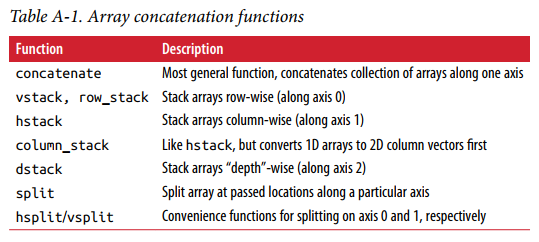

## Repeating Elements

The need to replicate or repeat arrays can be less common with `NumPy` than it is with other array programming frameworks like MATLAB. One reason for this is that broadcasting often fills this need better; see [advanced](advanced.ipynb).

But if such need arises nevertheless, try `tile` and `repeat`.

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations
on data in ndarrays. Here are some lists

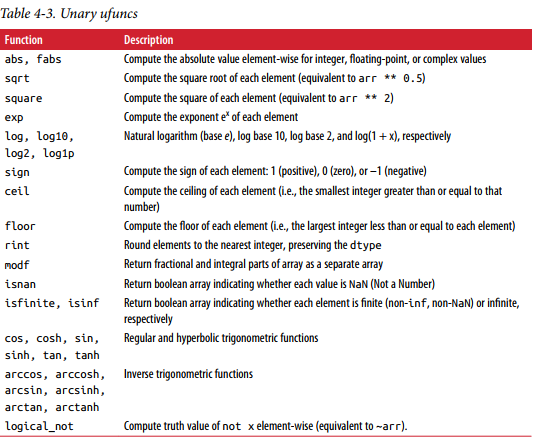

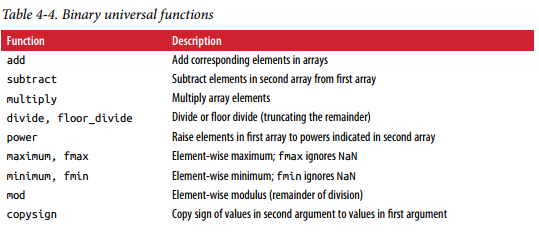

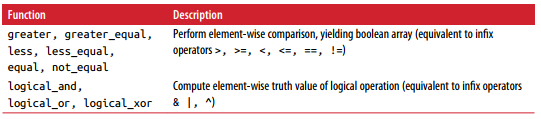

## Vectorization

The practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. 

## Mathematical and Statistical Methods

Many of these following functions take an optional `axis` argument that computes the statistic over the given axis.

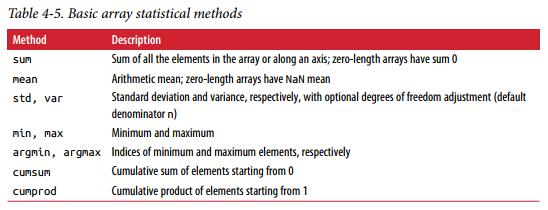

## Sorting

This is a subtle point. 
- Like Python’s built-in list, the ndarray `sort` instance method is an in-place sort, meaning that the array contents are rearranged without producing a new array.
- On the other hand, `numpy.sort` creates a new, sorted copy of an array. Otherwise, it accepts the same arguments (such as kind) as `ndarray.sort`.

Also note that neither of the `sort` method above has an `axis` argument.

Both `sort` method has the `axis` optional argument to specify sorting done along which axis.

### Indirect Sorts: argsort and lexsort

`argsort` and `lexsort` provider a list of indices that tells you how to reorder the data to be in sorted order, without sorting the input array. `lexsort` is similar to argsort, but it performs an indirect lexicographical sort on multiple key arrays. `lexsort` can be a bit confusing the first time you use it because the order in which the keys are used to order the data starts with the last array passed. 

In [ ]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()
indexer

In [ ]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter = np.lexsort((first_name, last_name))
sorter

By specifying the `kind` argument in `sort`, we can change the sorting algorithm used. Here 'stable' means elements of the same value remain their relative position after sorting.

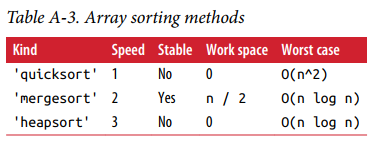

### Partially sorted

Suppose we only care about the $3$ smallest elements in the array. Then we can `partition` and `argpartition`. After you call `partition(arr, 3)`, the first three elements in the result are the smallest three values in no particular order. `numpy.argpartition`, similar to numpy.arg
sort, returns the indices that rearrange the data into the equivalent order

In [ ]:
arr = np.random.randn(20)
print(arr)
print(np.partition(arr, 3))
indices = np.argpartition(arr, 3)
print(indices)

### `numpy.searchsorted`: Finding Elements in a Sorted Array

`searchsorted` is an array method that performs a binary search on a sorted array, returning the location in the array where the value would need to be inserted to maintain sortedness. The default behavior is to return the index at the left side of a group of equal values: you can also change the `side` argument so that it returns the right side.

`searchsorted` can be used to find the right bin when trying to discretized data.

In [ ]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

## Trick of Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, `sum` is often used as a means of counting True values in a boolean array.

In [ ]:
arr = np.random.randn(100)
(arr > 0).sum()

## Array Set Operations

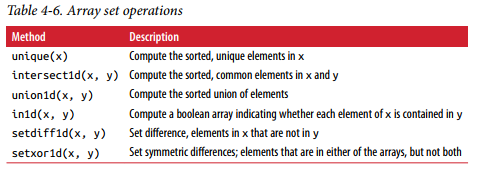

## Linear Algebra

Unlike some languages like MATLAB, multiplying two two-dimensional arrays with $*$ is an element-wise
product instead of a matrix dot product. Thus, there is a function `dot`, both an array method and a function in the numpy namespace, for matrix multiplication.

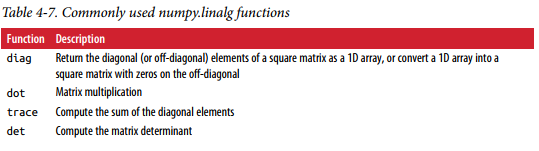

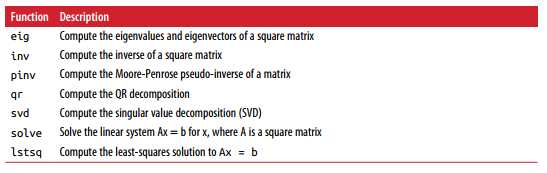

## Pseudorandom Number Generation - `np.random`

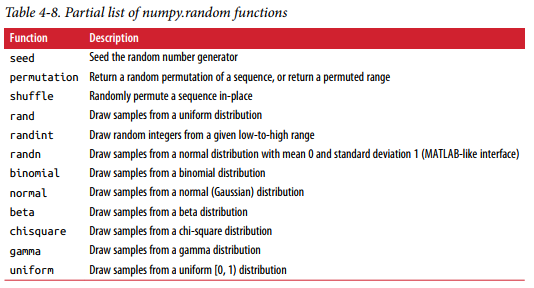

There is also `np.random.choice` to generate random samples for a given array.

## References

- < Python for Data Analysis >, ed2, Chapter 4, Appendix A.